# Eddy detection

This code would use the contours of the ssh to detect the eddy with specific morphology

In [2]:
from pylab import *
from netCDF4 import Dataset
%matplotlib inline
import os
from trackeddy.datastruct import *
from trackeddy.trackeddy import *
from trackeddy.geometryfunc import *
from trackeddy.init import *
from trackeddy.physics import *

In [2]:
outputpath='/g/data3/hh5/tmp/cosima/mom025/mom025_nyf/'
outputpath='/g/data1/v45/APE-MOM/gfdl_nyf_1080_cp/'
outputpath='/g/data/v45/akm157/model_output/mom/mom01v5_kds75/' #Adele's output
outputpath='/g/data/v45/jm5970/model_output/mom/mom025_gfdl_nyf_1080/'
outputfolders=sorted(list(os.walk(outputpath))[0][1])

years=len(outputfolders)
print years

1


In [3]:
years=1
for fp in range(0,years):
    moutputpath=outputpath+outputfolders[fp]+'/'
    files=[x for x in os.listdir(moutputpath) if x.endswith('.nc') and x.startswith('ocean__')]
    files=sorted(files)
    for ff in files:
        finalpath=moutputpath+ff
        print finalpath
        #ncfile=Dataset(finalpath)
        

In [4]:
ncfile=Dataset('/g/data/v45/jm5970/model_output/mom/mom025_gfdl_nyf_1080/output000/ocean_daily.nc')
eta=ncfile.variables['sea_level'][:]*100
etamean=mean(eta,axis=0)
print shape(etamean)
lon=ncfile.variables['xt_ocean'][:]
lat=ncfile.variables['yt_ocean'][:]
print ncfile
print shape(eta)

(1080, 1440)
<type 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    filename: ocean_daily.nc
    title: MOM4p1_CORE_IAF_v20120531_0849_noRestore_runoff_fix
    grid_type: mosaic
    grid_tile: 1
    dimensions(sizes): xt_ocean(1440), yt_ocean(1080), time(30), nv(2), xu_ocean(1440), yu_ocean(1080), st_ocean(50), st_edges_ocean(51)
    variables(dimensions): float64 xt_ocean(xt_ocean), float64 yt_ocean(yt_ocean), float64 time(time), float64 nv(nv), float64 xu_ocean(xu_ocean), float64 yu_ocean(yu_ocean), float64 st_ocean(st_ocean), float64 st_edges_ocean(st_edges_ocean), float32 geolon_t(yt_ocean,xt_ocean), float32 geolat_t(yt_ocean,xt_ocean), float32 geolon_c(yu_ocean,xu_ocean), float32 geolat_c(yu_ocean,xu_ocean), float32 temp(time,st_ocean,yt_ocean,xt_ocean), float32 salt(time,st_ocean,yt_ocean,xt_ocean), float32 age_global(time,st_ocean,yt_ocean,xt_ocean), float32 u(time,st_ocean,yu_ocean,xu_ocean), float32 v(time,st_ocean,yu_ocean,xu_ocean), 

In [5]:
ncfile=Dataset('/g/data/v45/akm157/model_output/mom/mom01v5_kds75/\
output333/rregionsouthern_ocean_daily_eta_t.nc')
print ncfile
eta=ncfile.variables['eta_t'][:]*100
etamean=mean(eta)
lon=ncfile.variables['xt_ocean_sub01'][:]
lat=ncfile.variables['yt_ocean_sub01'][:]
ncfileU=Dataset('/g/data/v45/akm157/model_output/mom/mom01v5_kds75/\
output333/rregionsouthern_ocean_daily_u.nc')
ncfileV=Dataset('/g/data/v45/akm157/model_output/mom/mom01v5_kds75/\
output333/rregionsouthern_ocean_daily_v.nc')
print ncfileV

<type 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    filename: rregionsouthern_ocean_daily_eta_t.nc
    title: MOM5_CORE_NYF_50lvl_comparison_test
    grid_type: mosaic
    grid_tile: 1
    dimensions(sizes): xt_ocean_sub01(3600), yt_ocean_sub01(931), time(92), nv(2)
    variables(dimensions): float64 xt_ocean_sub01(xt_ocean_sub01), float64 yt_ocean_sub01(yt_ocean_sub01), float64 time(time), float64 nv(nv), float32 eta_t(time,yt_ocean_sub01,xt_ocean_sub01), float64 average_T1(time), float64 average_T2(time), float64 average_DT(time), float64 time_bounds(time,nv)
    groups: 

<type 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    filename: rregionsouthern_ocean_daily_v.nc
    title: MOM5_CORE_NYF_50lvl_comparison_test
    grid_type: mosaic
    grid_tile: 1
    dimensions(sizes): xu_ocean_sub01(3600), yu_ocean_sub01(930), st_ocean(75), st_edges_ocean(76), time(92), nv(2)
    variables(dimensions): floa

## Functions necesary to calculate all the easy calculations

All the next functions are used for tiny steps in the calculation and identification of the eddies. This functions goes from Trigonometry up to special parameters to obtain a better understanding of the just Eddy Kinetic Energy.

In [6]:
tt=0
u=ncfileU.variables['u'][tt,:,:,:]
v=ncfileV.variables['v'][tt,:,:,:]
lonu=ncfileV.variables['xu_ocean_sub01'][:]
latu=ncfileV.variables['yu_ocean_sub01'][:]

/g/data3/hh5/public/apps/miniconda3/envs/analysis27/lib/python2.7/site-packages/numpy/ma/core.py:6468: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


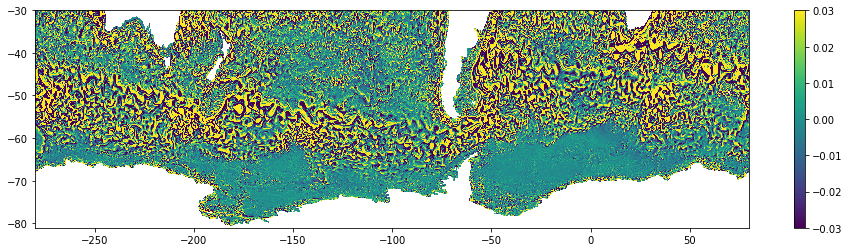

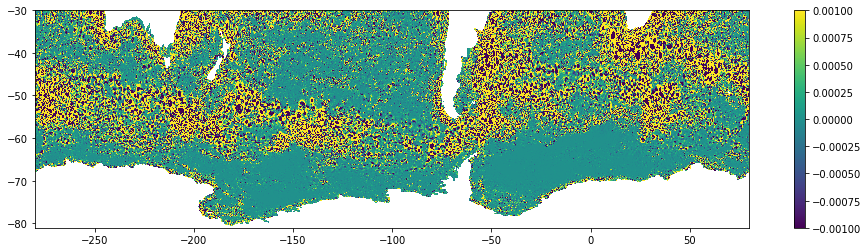

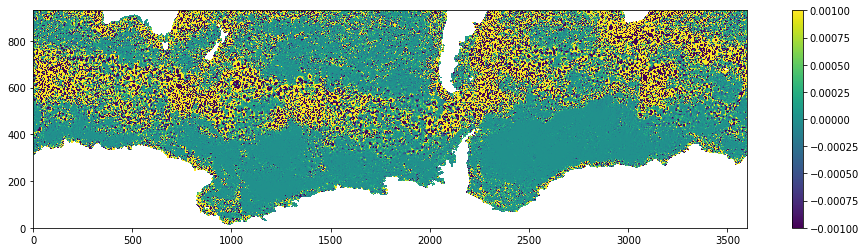

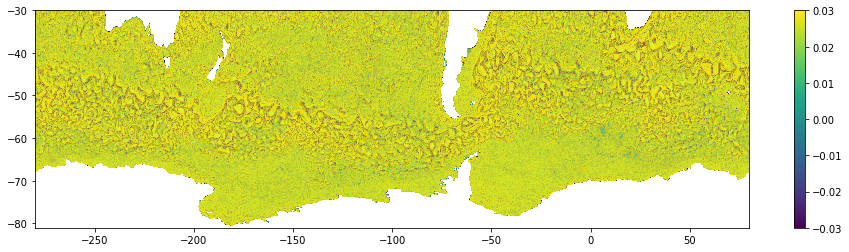

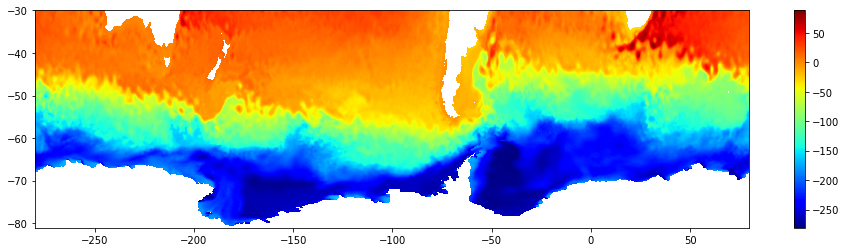

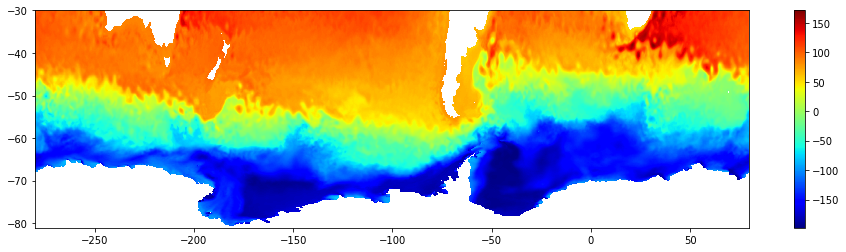

In [7]:
z=0
w=vorticity(u,v,z)
figure(figsize=(16,4))
pcolormesh(lonu,latu,w,vmin=-0.03,vmax=0.03)
colorbar()

okparm=okuboweissparm(u,v,z)
figure(figsize=(16,4))
pcolormesh(lonu,latu,okparm,vmin=-0.001,vmax=0.001)
colorbar()

figure(figsize=(16,4))
pcolormesh(okparm,vmin=-0.001,vmax=0.001)
colorbar()

#ll=linspace(-0.001,0.001,0.001)
figure(figsize=(16,4))
pcolormesh(lonu,latu,w,vmin=-0.03,vmax=0.03)
colorbar()
contourf(lonu,latu,okparm,level=0,cmap='jet', alpha=.5)

figure(figsize=(16,4))
pcolormesh(lon,lat,eta[tt,:,:],cmap='jet')
colorbar()

etaa=eta-etamean
figure(figsize=(16,4))
pcolormesh(lon,lat,etaa[tt,:,:],cmap='jet')
colorbar()

In [8]:
def eddycontour(data,cn,sr):
    '''
    *******************************Eddy Contour**********************************
    Eddy Contour is a function that obtains the nearest contour to 0 of each eddy.
    Input options:
    data = SSH data or any other data which has closed contours
    cn = Contour Number, it could be regular or iregular.
    sr = shape parameter for remove the contour
    '''
    #for cc in range(0,cn):
    cv2.isContourConvex(contour)

**********Starting iteration  0 **********
('The total of contours was', 53)
('ts', 0)
**********Finished iteration  0 **********
**********Starting iteration  1 **********
('The total of contours was', 62)
('ts', 1)
eddyn_31
*****New Eddy*****
eddyn_21
*****New Eddy*****
eddyn_20
number 22 max 65.3456636398 t0 (64.4947416274-0j) t1 64.4743370005 min 63.5823502383 area0 1.48060758293 area1 1.45831454245
22 -39.5848273006 (-40.1099856203-0j) -40.1150561384 -40.6564225152
****Tracking Eddy22****
eddyn_23
number 24 max -253.774964149 t0 -254.825620751 t1 (-254.729813543-0j) min -255.91475804 area0 1.99261097412 area1 1.5955805768
24 -38.2524587338 -38.7448399085 (-38.7775099421-0j) -39.3956272249
****Tracking Eddy24****
eddyn_22
number 23 max 51.9485252376 t0 51.1744028836 t1 51.1627701405 min 50.4050994181 area0 1.40087899752 area1 1.41952403545
23 -38.4787750081 -39.075971707 -39.0730696162 -39.6678401224
****Tracking Eddy23****
eddyn_25
*****New Eddy*****
eddyn_24
*****New Eddy*****
ed

LinAlgError: Singular matrix

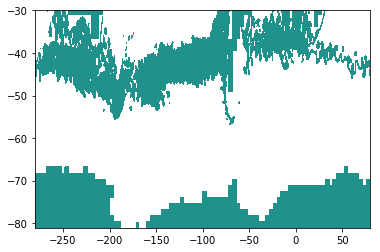

In [9]:
levels=[-10,10]
a=array([[0,len(lon)],[0,len(lat)]])
eddytd=scan_eddyt(eta,lat,lon,levels,10,a,destdir='',okparm='',diagnostics=False)

In [10]:
ncfile=Dataset('/g/data/v45/akm157/model_output/mom/mom01v5_kds75/\
output306/rregionsouthern_ocean_daily_eta_t.nc')
levels=[-80,80]
eta=ncfile.variables['eta_t'][:]*100
lon=ncfile.variables['xt_ocean_sub01'][:]
lat=ncfile.variables['yt_ocean_sub01'][:]

0
('The total of contours was', 15)
('ts', 0)
1
('The total of contours was', 19)
('ts', 1)
eddyn_6
*****New Eddy*****
eddyn_7
*****New Eddy*****
eddyn_4
number 6 max -189.518973446 t0 -190.117721737 t1 (-190.319645-0j) min -191.021555968 area0 1.02133698552 area1 0.998454112967
6 -57.3854113504 -57.8114705941 (-57.8053165155-0j) -58.2513304475
****Tracking Eddy6****
eddyn_5
number 8 max -231.75007266 t0 -232.52417487 t1 (-232.505947363-0j) min -233.253281074 area0 0.649327958468 area1 0.792736877629
8 -53.9795924137 -54.3346750279 (-54.3308871636-0j) -54.6646294305
****Tracking Eddy8****
eddyn_2
number 3 max -189.912875523 t0 (-190.633589664-0j) t1 -190.601963209 min -191.380379115 area0 0.88027081528 area1 0.920441020105
3 -58.5474636389 (-58.9916927511-0j) -58.9523935504 -59.3748100105
****Tracking Eddy3****
eddyn_3
number 4 max -186.835062678 t0 -187.291216337 t1 -187.347017008 min -187.84579642 area0 0.320245533076 area1 0.306912450411
4 -58.5783606636 -58.7515424353 -58.775165925

('The total of contours was', 22)
('ts', 11)
eddyn_6
*****New Eddy*****
eddyn_7
*****New Eddy*****
eddyn_4
*****New Eddy*****
eddyn_5
*****New Eddy*****
eddyn_2
number 4 max -189.927012102 t0 (-190.679034964-0j) t1 -190.703672674 min -191.45898237 area0 [ 0.85351382] area1 0.68902171863
4 -58.3105039544 (-58.6876635923-0j) -58.7147409353 -59.1285876675
****Tracking Eddy4****
eddyn_3
*****New Eddy*****
eddyn_0
*****New Eddy*****
eddyn_1
number 2 max -137.863294261 t0 (-138.45709321+0j) t1 -138.494562935 min -139.10199504 area0 [ 0.45691557] area1 0.509269489965
2 -59.1313569039 (-59.4283896464+0j) -59.4005656852 -59.6566266872
****Tracking Eddy2****
eddyn_8
*****New Eddy*****
eddyn_9
*****New Eddy*****
eddyn_10
*****New Eddy*****
eddyn_11
*****New Eddy*****
eddyn_12
*****New Eddy*****
eddyn_13
*****New Eddy*****
eddyn_14
*****New Eddy*****
eddyn_15
*****New Eddy*****
12
('The total of contours was', 21)
('ts', 12)
eddyn_6
*****New Eddy*****
eddyn_7
*****New Eddy*****
eddyn_4
*****New Ed

('The total of contours was', 17)
('ts', 24)
eddyn_6
*****New Eddy*****
eddyn_7
*****New Eddy*****
eddyn_4
*****New Eddy*****
eddyn_5
number 3 max -231.393865286 t0 (-232.499277019+0j) t1 -232.260842924 min -233.169153563 area0 [ 1.03062673] area1 0.836088538519
3 -54.0220717342 (-54.3115208808+0j) -54.3316497549 -54.6467581162
****Tracking Eddy3****
eddyn_2
*****New Eddy*****
eddyn_3
*****New Eddy*****
eddyn_0
*****New Eddy*****
eddyn_1
*****New Eddy*****
eddyn_8
*****New Eddy*****
eddyn_9
*****New Eddy*****
eddyn_10
*****New Eddy*****
eddyn_11
*****New Eddy*****
eddyn_12
*****New Eddy*****
eddyn_13
*****New Eddy*****
eddyn_14
*****New Eddy*****
eddyn_15
*****New Eddy*****
eddyn_16
*****New Eddy*****
25
('The total of contours was', 14)
('ts', 25)
eddyn_6
*****New Eddy*****
eddyn_7
*****New Eddy*****
eddyn_4
*****New Eddy*****
eddyn_5
number 3 max -231.405829131 t0 (-232.260842924+0j) t1 (-232.223296978-0j) min -233.073931893 area0 [ 0.83608854] area1 0.747228687571
3 -54.0463624489 (

('The total of contours was', 15)
('ts', 39)
eddyn_6
*****New Eddy*****
eddyn_7
*****New Eddy*****
eddyn_4
*****New Eddy*****
eddyn_5
number 3 max -231.149286861 t0 (-232.230384029-0j) t1 -232.222804437 min -233.342701364 area0 [ 0.84171097] area1 0.815424805856
3 -54.0587914473 (-54.329835602-0j) -54.275885292 -54.506265363
****Tracking Eddy3****
eddyn_2
*****New Eddy*****
eddyn_3
*****New Eddy*****
eddyn_0
*****New Eddy*****
eddyn_1
*****New Eddy*****
eddyn_8
*****New Eddy*****
eddyn_9
*****New Eddy*****
eddyn_10
*****New Eddy*****
eddyn_11
*****New Eddy*****
eddyn_12
*****New Eddy*****
eddyn_13
*****New Eddy*****
eddyn_14
*****New Eddy*****
eddyn_15
*****New Eddy*****
eddyn_16
*****New Eddy*****
40
('The total of contours was', 17)
('ts', 40)
eddyn_6
*****New Eddy*****
eddyn_7
*****New Eddy*****
eddyn_4
*****New Eddy*****
eddyn_5
*****New Eddy*****
eddyn_2
*****New Eddy*****
eddyn_3
*****New Eddy*****
eddyn_0
*****New Eddy*****
eddyn_1
*****New Eddy*****
eddyn_8
*****New Eddy*****
e

('The total of contours was', 17)
('ts', 55)
eddyn_6
*****New Eddy*****
eddyn_7
*****New Eddy*****
eddyn_4
*****New Eddy*****
eddyn_5
*****New Eddy*****
eddyn_2
*****New Eddy*****
eddyn_3
*****New Eddy*****
eddyn_0
*****New Eddy*****
eddyn_1
*****New Eddy*****
eddyn_8
*****New Eddy*****
eddyn_9
*****New Eddy*****
eddyn_10
*****New Eddy*****
eddyn_11
*****New Eddy*****
eddyn_12
*****New Eddy*****
eddyn_13
*****New Eddy*****
eddyn_14
*****New Eddy*****
eddyn_15
*****New Eddy*****
eddyn_16
*****New Eddy*****
56
('The total of contours was', 14)
('ts', 56)
eddyn_6
*****New Eddy*****
eddyn_7
*****New Eddy*****
eddyn_4
*****New Eddy*****
eddyn_5
*****New Eddy*****
eddyn_2
*****New Eddy*****
eddyn_3
number 2 max -186.854908253 t0 (-187.862960729+0j) t1 -187.48563883 min -188.013709771 area0 [ 0.29116899] area1 0.290779769944
2 -58.7695123133 (-58.9454703427+0j) -58.9750497244 -59.150626373
****Tracking Eddy2****
eddyn_0
*****New Eddy*****
eddyn_1
*****New Eddy*****
eddyn_8
*****New Eddy*****


('The total of contours was', 15)
('ts', 71)
eddyn_6
*****New Eddy*****
eddyn_7
*****New Eddy*****
eddyn_4
*****New Eddy*****
eddyn_5
*****New Eddy*****
eddyn_2
*****New Eddy*****
eddyn_3
*****New Eddy*****
eddyn_0
*****New Eddy*****
eddyn_1
*****New Eddy*****
eddyn_8
*****New Eddy*****
eddyn_9
*****New Eddy*****
eddyn_10
*****New Eddy*****
eddyn_11
*****New Eddy*****
eddyn_12
*****New Eddy*****
eddyn_13
*****New Eddy*****
eddyn_14
*****New Eddy*****
eddyn_15
*****New Eddy*****
eddyn_16
*****New Eddy*****
72
('The total of contours was', 13)
('ts', 72)
eddyn_6
*****New Eddy*****
eddyn_7
*****New Eddy*****
eddyn_4
*****New Eddy*****
eddyn_5
*****New Eddy*****
eddyn_2
*****New Eddy*****
eddyn_3
*****New Eddy*****
eddyn_0
*****New Eddy*****
eddyn_1
*****New Eddy*****
eddyn_8
*****New Eddy*****
eddyn_9
*****New Eddy*****
eddyn_10
*****New Eddy*****
eddyn_11
*****New Eddy*****
eddyn_12
*****New Eddy*****
eddyn_13
*****New Eddy*****
eddyn_14
*****New Eddy*****
eddyn_15
*****New Eddy*****
edd

('The total of contours was', 16)
('ts', 87)
eddyn_6
*****New Eddy*****
eddyn_7
*****New Eddy*****
eddyn_4
*****New Eddy*****
eddyn_5
*****New Eddy*****
eddyn_2
*****New Eddy*****
eddyn_3
*****New Eddy*****
eddyn_0
*****New Eddy*****
eddyn_1
*****New Eddy*****
eddyn_8
*****New Eddy*****
eddyn_9
*****New Eddy*****
eddyn_10
*****New Eddy*****
eddyn_11
*****New Eddy*****
eddyn_12
*****New Eddy*****
eddyn_13
*****New Eddy*****
eddyn_14
*****New Eddy*****
eddyn_15
*****New Eddy*****
eddyn_16
*****New Eddy*****
88
('The total of contours was', 15)
('ts', 88)
eddyn_6
*****New Eddy*****
eddyn_7
*****New Eddy*****
eddyn_4
*****New Eddy*****
eddyn_5
*****New Eddy*****
eddyn_2
*****New Eddy*****
eddyn_3
*****New Eddy*****
eddyn_0
*****New Eddy*****
eddyn_1
*****New Eddy*****
eddyn_8
*****New Eddy*****
eddyn_9
*****New Eddy*****
eddyn_10
*****New Eddy*****
eddyn_11
*****New Eddy*****
eddyn_12
*****New Eddy*****
eddyn_13
*****New Eddy*****
eddyn_14
*****New Eddy*****
eddyn_15
*****New Eddy*****
edd

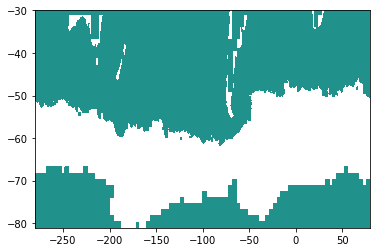

In [11]:
for ii in range(0,shape(eta)[0]):
    print ii
    eddys=scan_eddym(eta,lon,lat,levels,ii,a,destdir='',okparm='',diagnostics=False)
    if ii==0:
        eddytd=dict_eddyt(ii,eddys)
    else:
        eddytd=dict_eddyt(ii,eddys,eddytd) 

In [12]:
ncfileu=Dataset('/g/data/v45/akm157/model_output/mom/mom01v5_kds75/\
output306/rregionsouthern_ocean_daily_u.nc')
ncfilev=Dataset('/g/data/v45/akm157/model_output/mom/mom01v5_kds75/\
output306/rregionsouthern_ocean_daily_v.nc')
print ncfileu
lonu=ncfileu.variables['xu_ocean_sub01'][:]
latu=ncfileu.variables['yu_ocean_sub01'][:]
u=ncfileu.variables['u'][:,0,:,:]
v=ncfilev.variables['v'][:,0,:,:]

<type 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    filename: rregionsouthern_ocean_daily_u.nc
    title: MOM5_CORE_NYF_50lvl_comparison_test
    grid_type: mosaic
    grid_tile: 1
    dimensions(sizes): xu_ocean_sub01(3600), yu_ocean_sub01(930), st_ocean(75), st_edges_ocean(76), time(90), nv(2)
    variables(dimensions): float64 xu_ocean_sub01(xu_ocean_sub01), float64 yu_ocean_sub01(yu_ocean_sub01), float64 st_ocean(st_ocean), float64 st_edges_ocean(st_edges_ocean), float64 time(time), float64 nv(nv), float32 u(time,st_ocean,yu_ocean_sub01,xu_ocean_sub01), float64 average_T1(time), float64 average_T2(time), float64 average_DT(time), float64 time_bounds(time,nv)
    groups: 



0
1
2
4
6
7
9
10
11
12
14
15
16
17
18
19


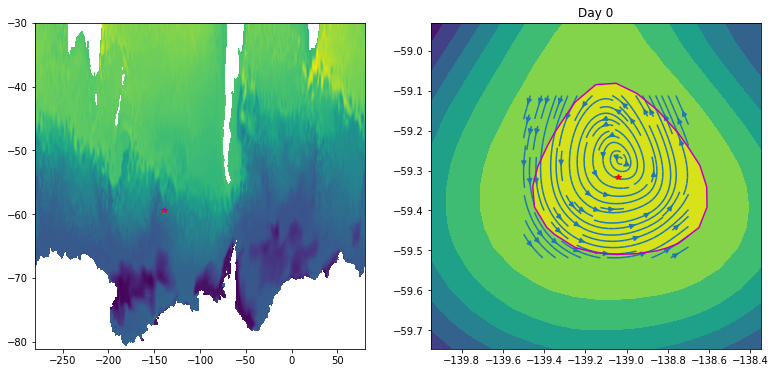

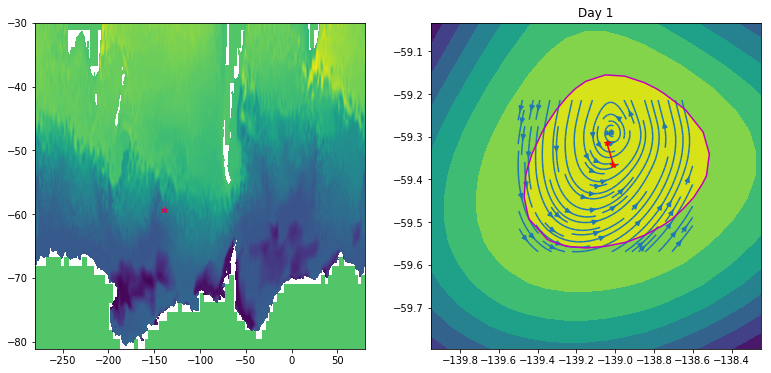

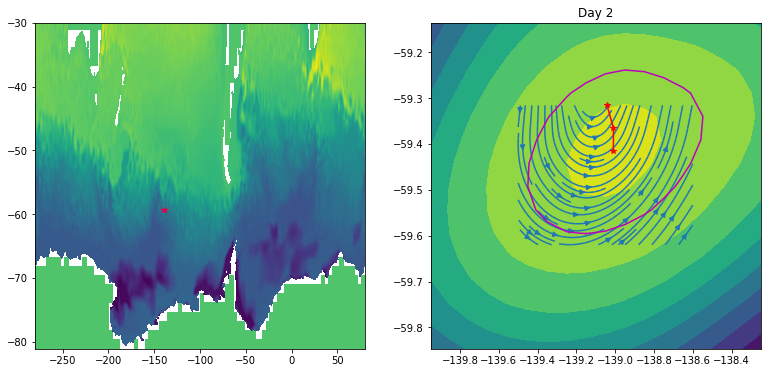

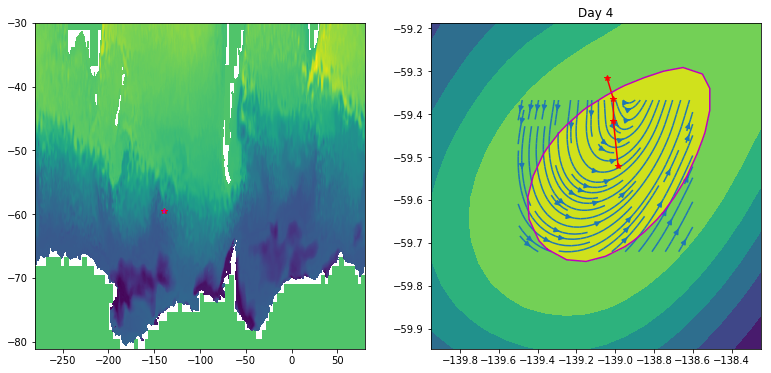

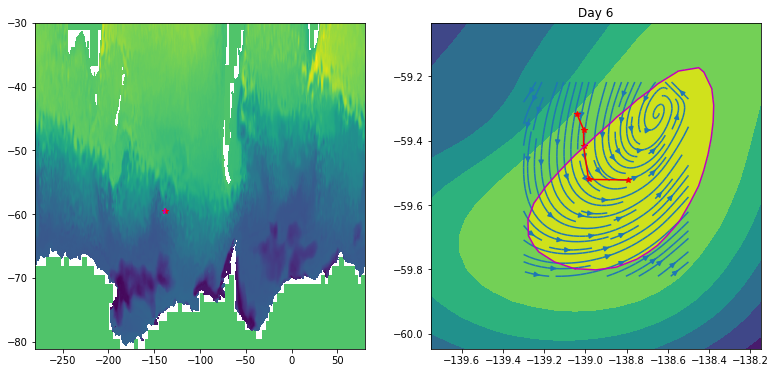

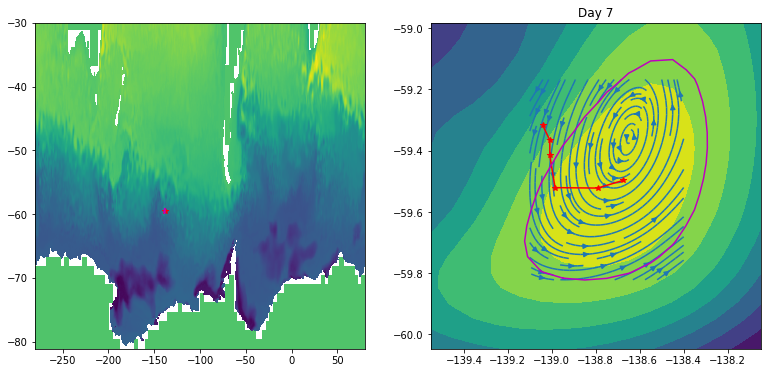

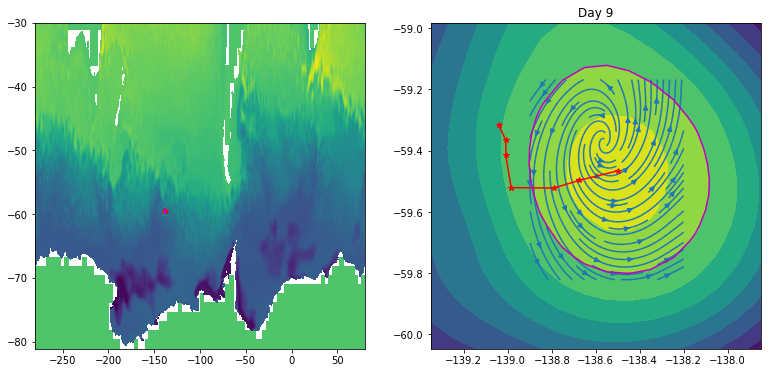

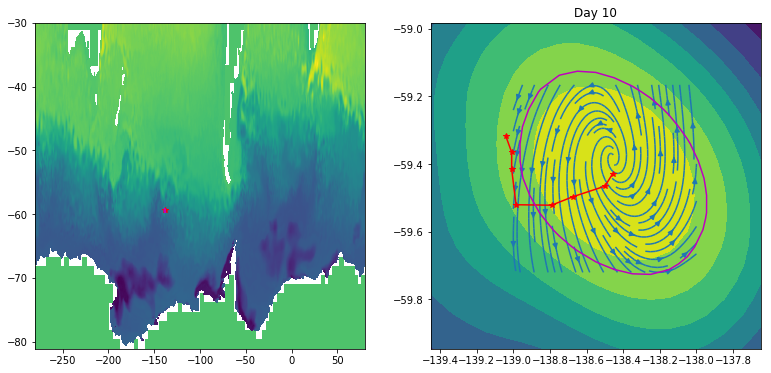

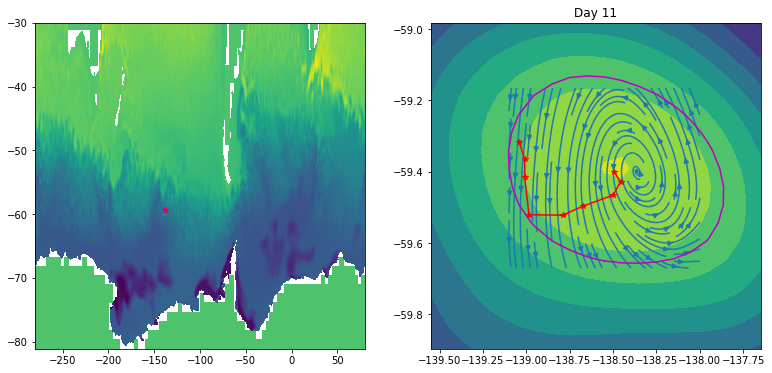

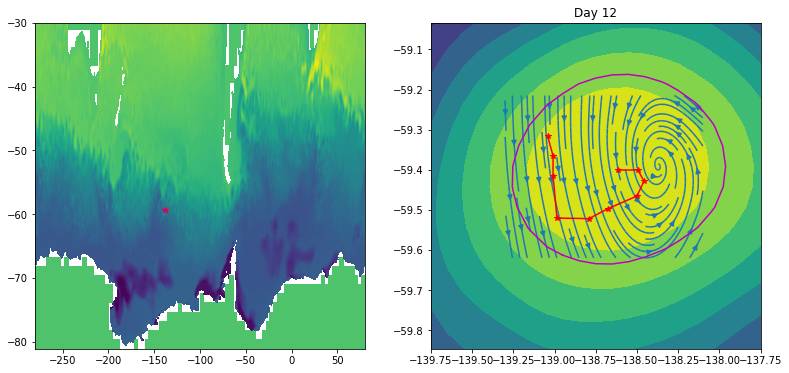

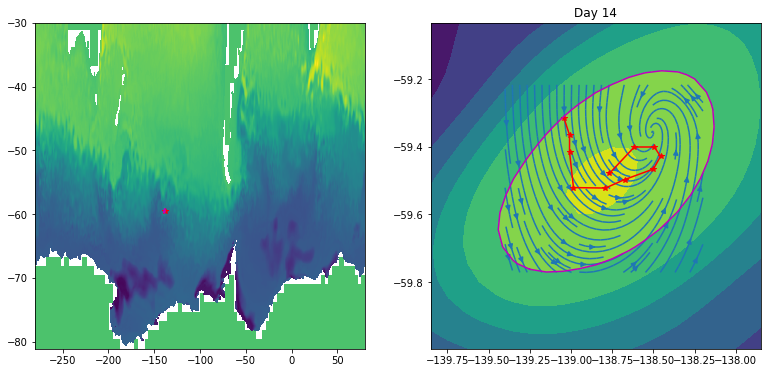

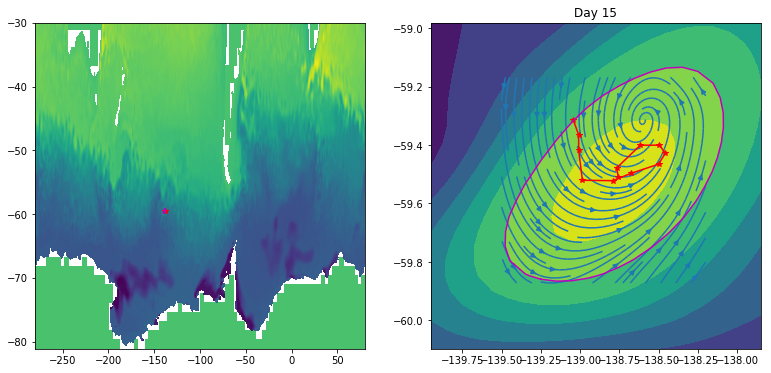

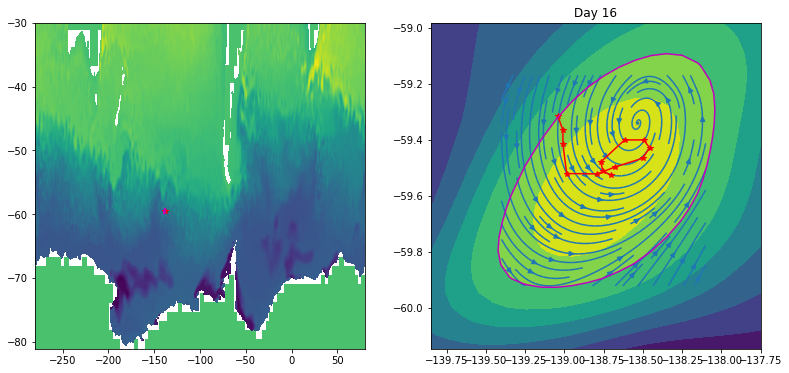

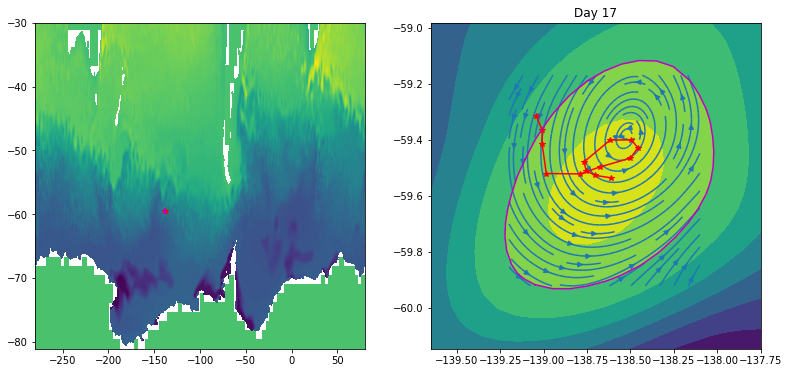

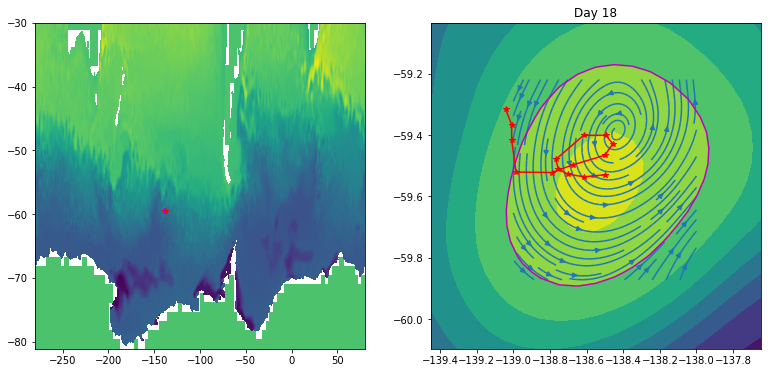

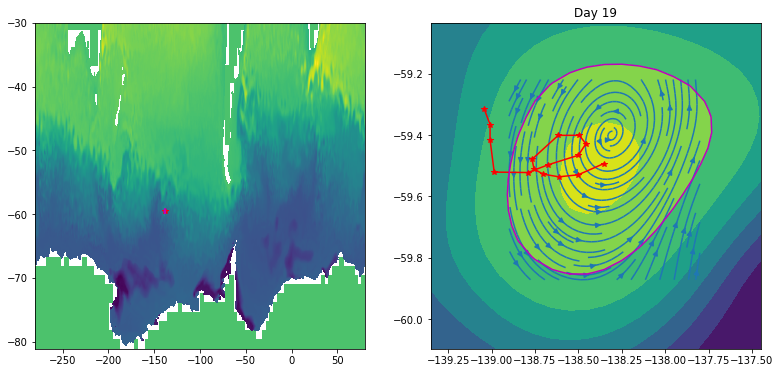

In [15]:
#4,2,3
eddy='eddyn_1'
#print eddytd[eddy]['position']
for ii in range(0,len(eddytd[eddy]['time'])):
    rdd=eddytd[eddy]['time'][ii][0]
    print rdd
    dd="%03d" % ii
    f, (ax1, ax2) = plt.subplots(1, 2,figsize=(13, 6))
    ax1.pcolormesh(lon,lat,eta[rdd,:,:])
    ax1.plot(eddytd[eddy]['position'][ii,0],eddytd[eddy]['position'][ii,1],'*r')
    ax1.plot(eddytd[eddy]['contour'][ii,0],eddytd[eddy]['contour'][ii,1],'-m')
    c1,c2=find2d(lonu,latu,eddytd[eddy]['contour'][ii,0].min(),eddytd[eddy]['contour'][ii,1].min())
    c3,c4=find2d(lonu,latu,eddytd[eddy]['contour'][ii,0].max(),eddytd[eddy]['contour'][ii,1].max())
    ax2.contourf(lon[c1-4:c3+4],lat[c2-4:c4+4],eta[rdd,c2-4:c4+4,c1-4:c3+4])
    ax2.plot(eddytd[eddy]['position'][0:ii+1,0],eddytd[eddy]['position'][0:ii+1,1],'-r')
    ax2.plot(eddytd[eddy]['position'][0:ii+1,0],eddytd[eddy]['position'][0:ii+1,1],'*r')
    ax2.plot(eddytd[eddy]['contour'][ii,0],eddytd[eddy]['contour'][ii,1],'-m')
    #print eddytd['eddyn_14']['contour'][:,1]
    #print u[ii,c2:c4,c1:c3]
    #print lonu[c1],lonu[c3],latu[c2],latu[c4]
    ax2.streamplot(lonu[c1:c3],latu[c2:c4],u[ii,c2:c4,c1:c3],v[rdd,c2:c4,c1:c3])
    #ax2.set_ylim([eddytd[eddy]['contour'][ii,1].min(),eddytd[eddy]['contour'][ii,1].max()])
    #ax2.set_xlim([eddytd[eddy]['contour'][ii,0].min(),eddytd[eddy]['contour'][ii,0].max()])
    ax2.set_title('Day '+str(rdd))
    f.savefig('../output/'+eddy+str(dd)+'.png', bbox_inches='tight')
#eddytd['eddyn_14']
#figure()
#streamplot(lonu,latu,u[ii,:,:],v[ii,:,:], density=1)


In [ ]:
#print shape(eddys['Position'])
#print shape(eddys['Ellipse'])
#eddypos=eddys['Position']
#print eddypos[0]

#for ii in range(0,shape(eddys['Position'])[0]):
#    
    
figure(figsize=(15,5))
pcolormesh(lon,lat,eta[0,:,:])
for value in eddytd:
    poss=eddytd[value]['position']
    if len(poss)==2:
        plot(poss[0],poss[1],'or')
    else:
        plot(poss[:,0],poss[:,1],'or')
colorbar()

# Functions to extract data of each eddy in the Ocean

In [ ]:
#print eddytd['eddyn_1']['contour']
#mask function V1

##SAVE LEVEL IN THE EDDYN DATABASE

level=-80
threshold=1
for ct in range(0,len(eddytd['eddyn_1']['time'])):
    rct=eddytd['eddyn_1']['time'][ct][0]
    data=eta[rct,:,:]*1
    juesteddy=zeros(shape(data))
    lonmi=eddytd['eddyn_1']['contour'][ct][0].min()
    lonma=eddytd['eddyn_1']['contour'][ct][0].max()
    latmi=eddytd['eddyn_1']['contour'][ct][1].min()
    latma=eddytd['eddyn_1']['contour'][ct][1].max()
    #print latma, lonma
    mimcx,mimcy=find2d(lon,lat,lonmi,latmi)
    mamcx,mamcy=find2d(lon,lat,lonma,latma)
    
    loncm=lon[mimcx-threshold:mamcx+1+threshold]
    latcm=lat[mimcy-threshold:mamcy+1+threshold]
    datacm=data[mimcy-threshold:mamcy+1+threshold,mimcx-threshold:mamcx+1+threshold]
    datacm[datacm<=level]=nan
    pcolormesh(lon[mimcx-threshold:mamcx+1+threshold],lat[mimcy-threshold:mamcy+1+threshold],datacm)
    contourf(lon[mimcx-threshold:mamcx+1+threshold],lat[mimcy-threshold:mamcy+1+threshold],datacm,alpha=0.5)
    plot(eddytd['eddyn_1']['contour'][ct][0],eddytd['eddyn_1']['contour'][ct][1],'-m')
    plt.show()        
    juesteddy[mimcy-threshold:mamcy+1+threshold,mimcx-threshold:mamcx+1+threshold]=datacm

In [ ]:
print shape(juesteddy)

In [ ]:
eddysplot = ma.masked_where(np.isnan(juesteddy),juesteddy)
pcolormesh(lon,lat,eddysplot)

In [ ]:
figure()
pcolormesh(lon,lat,data-eddysplot)
colorbar()
figure()
pcolormesh(lon,lat,eta[0,:,:])
colorbar()

# SSH time average 

Calculate the ssh mean of all the Adele experiments.

In [ ]:
timeavessh=zeros([345-306,shape(eta)[1],shape(eta)[2]])
print shape(timeavessh)

In [ ]:
count=0
for tt in range(306,345):
    ncfile=Dataset('/g/data/v45/akm157/model_output/mom/mom01v5_kds75/output'+str(tt)+'/rregionsouthern_ocean_daily_eta_t.nc')
    eta=ncfile.variables['eta_t'][:]*100
    etamean=mean(eta,axis=0)
    timeavessh[count,:,:]=etamean[:,:]
    count=count+1

In [ ]:
realmean=mean(timeavessh,axis=0)
figure()
pcolormesh(lon,lat,realmean)
colorbar()
figure()
pcolormesh(lon,lat,eta[0,:,:]-realmean)
colorbar()

In [ ]:
etaa=eta-realmean
levels=[-40,40]
for ii in range(0,shape(eta)[0]):
    print ii
    eddys=scan_eddym(etaa,lon,lat,levels,ii,a,destdir='',okparm='',diagnostics=False)
    if ii==0:
        eddytd=dict_eddyt(ii,eddys)
    else:
        eddytd=dict_eddyt(ii,eddys,eddytd) 

In [ ]:
eddytd['eddyn_2']['time']

In [ ]:
eddy='eddyn_2'
#print eddytd[eddy]['position']
for ii in range(0,len(eddytd[eddy]['time'])):
    rdd=eddytd[eddy]['time'][ii][0]
    print rdd
    dd="%03d" % ii
    f, (ax1, ax2) = plt.subplots(1, 2,figsize=(13, 6))
    map1=ax1.pcolormesh(lon,lat,eta[rdd,:,:])
    ax1.plot(eddytd[eddy]['position'][ii,0],eddytd[eddy]['position'][ii,1],'*r')
    ax1.plot(eddytd[eddy]['contour'][ii,0],eddytd[eddy]['contour'][ii,1],'-m')
    c1,c2=find2d(lonu,latu,eddytd[eddy]['contour'][ii,0].min(),eddytd[eddy]['contour'][ii,1].min())
    c3,c4=find2d(lonu,latu,eddytd[eddy]['contour'][ii,0].max(),eddytd[eddy]['contour'][ii,1].max())
    ax2.contourf(lon[c1-4:c3+4],lat[c2-4:c4+4],eta[rdd,c2-4:c4+4,c1-4:c3+4])
    ax2.plot(eddytd[eddy]['position'][0:ii+1,0],eddytd[eddy]['position'][0:ii+1,1],'-r')
    ax2.plot(eddytd[eddy]['position'][0:ii+1,0],eddytd[eddy]['position'][0:ii+1,1],'*r')
    ax2.plot(eddytd[eddy]['contour'][ii,0],eddytd[eddy]['contour'][ii,1],'-m')
    ax2.streamplot(lonu[c1:c3],latu[c2:c4],u[ii,c2:c4,c1:c3],v[rdd,c2:c4,c1:c3])
    ax2.set_title('Day '+str(rdd))
    f.savefig('./figures/'+eddy+str(dd)+'.png', bbox_inches='tight')
    #f.close()

# Okubo-Weiss Parameter ($W$)

Calculate the W parameter for the geostrophically velocity components:<br>
\begin{equation}
v=(g/f)h_x
\end{equation}
\begin{equation}
u=-(g/f)h_y
\end{equation}
where $h$ is the SSH, $g$ is the gravitational acceleration and $f$ is the Coriolis parameter.